In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point

# import missingno as msn

import seaborn as sns

In [5]:
data = pd.read_csv('stations_2021.csv')

data = data[data['Fuel Type Code'] == 'ELEC']

data

/Users/aidanwebster/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3,6,10,13,14,15,16,20,29,31,33,34,35,36,43,45,46,47,49,52,53,54,56,57,58,59,60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
159,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,ELEC,Southern California Edison - Rosemead Office B...,2244 Walnut Grove Ave,NaN,Rosemead,CA,91770,NaN,NaN,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56789,ELEC,SWEC_ SWEC2,6800 RT 162,NaN,Maryville,IL,62062,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56790,ELEC,Calabasas Rondell Smart Park,23600 Rondell St.,NaN,Calabasas,CA,91301,NaN,877-455-3833,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56791,ELEC,Figueroa Plaza P2,201 N Figueroa St,NaN,Los Angeles,CA,90012,NaN,855-900-7584,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56792,ELEC,Figueroa Plaza P3,201 N Figueroa St,NaN,Los Angeles,CA,90012,NaN,855-900-7584,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
gdf = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.Longitude, data.Latitude))
# print(gdf.head())

In [9]:
states = geopandas.read_file('shapes/shapefile.shx')
states = states[['NAME','STUSPS','geometry']]
states = states.rename(columns={'NAME':'State'})

In [13]:
states.head()

,State,STUSPS,geometry
0,Nebraska,NE,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,Washington,WA,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,New Mexico,NM,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,South Dakota,SD,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,Texas,TX,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


KeyError: 'NAME'

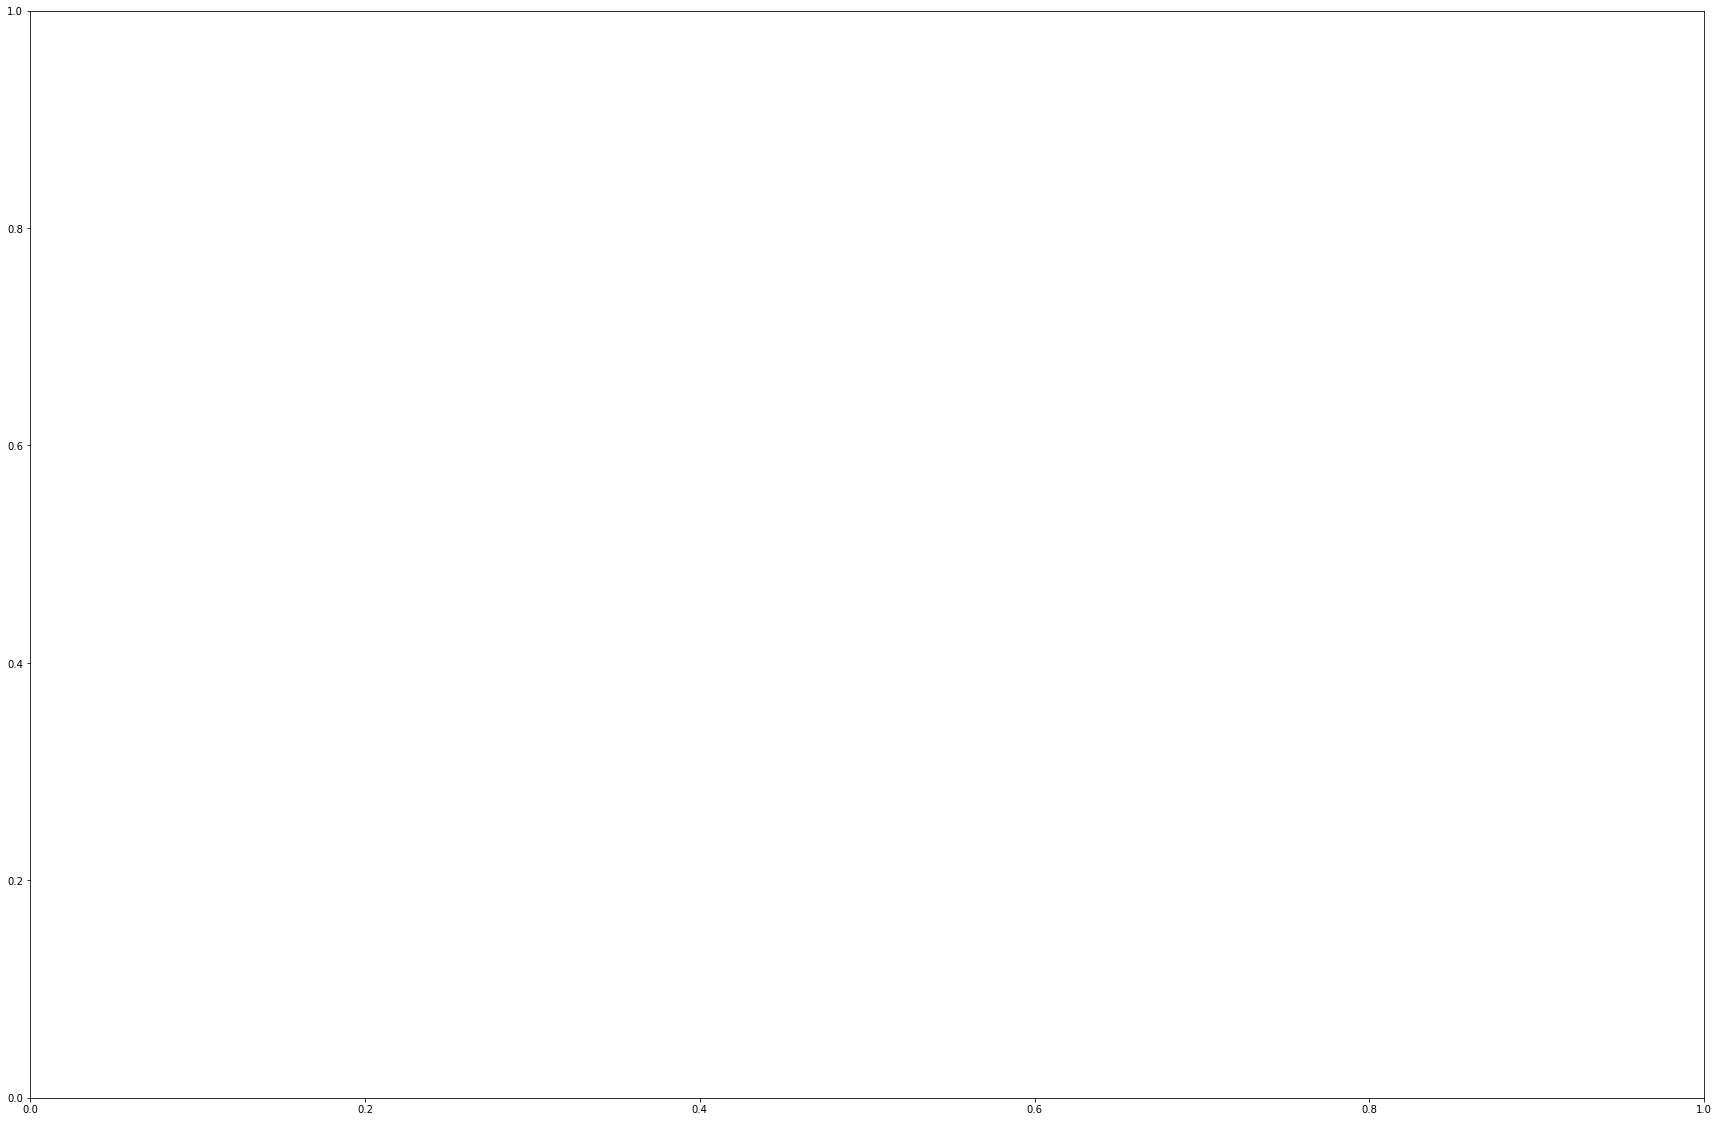

In [14]:
#country = geopandas.read_file('gz_2010_us_040_00_5m.json')

# country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#3B3C6E');

geo = geopandas.GeoDataFrame(data, geometry='geometry')
type(data['geometry'])


# geo.plot(figsize=(20,10));

fig, ax = plt.subplots(1, figsize=(30,20))

base = states[states['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

geo.plot(ax=base, color='green', marker="*", markersize=15);